In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [32]:
df = pd.read_csv("data/feedback.csv")
df.head()

,id,descFeedback,rate,product_id,user_id
0,1,Very good quality.,4,1034,2
1,2,Will buy again!,5,60,2
2,3,Excellent product!,5,3829,2
3,4,Will buy again!,1,4824,2
4,5,Not bad.,1,924,2


In [33]:
# Create the user-item interaction matrix (ratings)
pivot = df.pivot_table(index='user_id', columns='product_id', values='rate', fill_value=0)
pivot.head()


product_id,1,2,6,10,11,18,22,23,26,27,...,6974,6975,6977,6979,6986,6993,6995,6996,6997,7000
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# KNN
results = {}

knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(pivot)

pred_knn = []
act_knn = []

for user in pivot.index:
    distances, indices = knn_model.kneighbors([pivot.loc[user]], n_neighbors=6)
    neighbors = pivot.iloc[indices.flatten()[1:]]
    pred = neighbors.mean().mean()
    act = pivot.loc[user].mean()
    pred_knn.append(pred)
    act_knn.append(act)

rmse_knn = mean_squared_error(act_knn, pred_knn) ** 0.5
results['KNN'] = rmse_knn
print(f"KNN RMSE: {rmse_knn:.4f}")


KNN RMSE: 0.0096


In [35]:
# SVD
svd = TruncatedSVD(n_components=20, random_state=42)
reduced = svd.fit_transform(pivot)
reconstructed = np.dot(reduced, svd.components_)

rmse_svd = mean_squared_error(pivot.values, reconstructed) ** 0.5
results['SVD'] = rmse_svd
print(f"SVD RMSE: {rmse_svd:.4f}")


SVD RMSE: 0.3580


In [36]:
# KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(pivot)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pred_kmeans = centroids[labels]
rmse_kmeans = mean_squared_error(pivot.values, pred_kmeans) ** 0.5
results['KMeans'] = rmse_kmeans
print(f"KMeans RMSE: {rmse_kmeans:.4f}")


KMeans RMSE: 0.5633


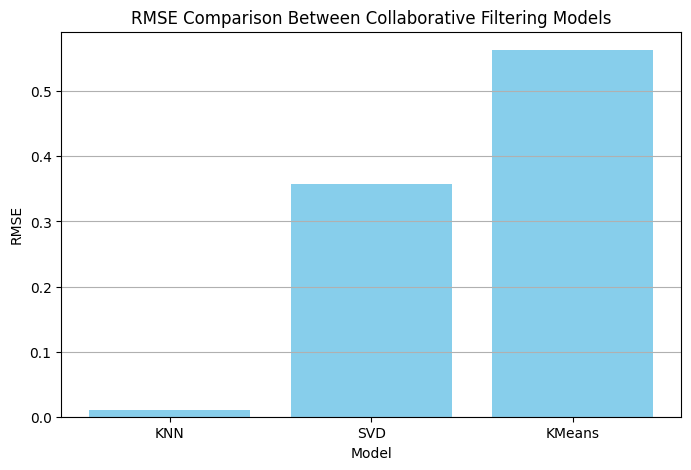

In [37]:
# Visualize the RMSE of all models
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("RMSE Comparison Between Collaborative Filtering Models")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.grid(axis='y')
plt.show()


In [38]:
best_model = min(results, key=results.get)
best_score = results[best_model]

print(f"✅ The best performing model is: {best_model}")
print(f"🏆 RMSE Score: {best_score:.4f}")


✅ The best performing model is: KNN
🏆 RMSE Score: 0.0096
